In [65]:
def var(cnt, s1, s2):
    assert cnt != 0
    return s2 / cnt - (s1 / cnt) ** 2

def cov(x, y):
    return np.mean(x * y) - np.mean(x) * np.mean(y)

def corr(x, y):
    if np.var(x) == 0:
        return 0
    return cov(x, y) / math.sqrt(np.var(x) * np.var(y))

def generate_data(size, d):
    x = []
    x.append(np.random.normal(3, 1, size))
    x.append(np.random.normal(-2, 1, size))
    x.append(x[0] + 2 * x[1])
    x.append((x[1] + 2)**2)
    x.append(np.random.binomial(n=1, p=0.8, size=size))
    for _ in range(d - 5):
        x.append(np.random.normal(0, 0.1, size))

    def compute_y(x):
        y = 4 - 3 * x[0] * x[0] + x[2] - 0.01 * x[3] + x[1] * x[4] + np.random.normal(0, 0.1, len(x[0]))
        return y
    
    def transpose(temp):
        temp = np.array(temp)
        return temp.T
    
    xt = transpose(x)
    y = compute_y(x)
    
    return x, xt, y

class DecisionTree():   

    def __init__(self, x, y, d, max_depth, min_sample_size):
        self.x = x
        self.y = y
        
        self.max_depth = max_depth
        self.min_sample_size = min_sample_size
        self.depth = d 
        self.child = len(self.x[0]) <= self.min_sample_size or self.depth == self.max_depth or np.var(y) == 0
        
        self.ind = -1
        self.threshold = 0
        
        self.result = np.mean(y)
        self.left, self.right = None, None

        if not self.child:
            self.split()
    
    def find_best_feature(self):
        all_corr = [abs(corr(xi, self.y)) for xi in self.x]
        return np.argmax(all_corr)
    
    def find_threshold_split(self, ind):
        indices = self.x[ind].argsort()
        
        for i in range(len(self.x)):
            self.x[i] = self.x[i][indices]
        self.y = self.y[indices]
        
        threshold = -1
        mn = float('inf')

        for i in range(len(self.y) - 1):
            fltr_left = self.x[ind] <= self.x[ind][i]
            fltr_right = self.x[ind] > self.x[ind][i]
            
            var_left = np.var(self.y[fltr_left])
            var_right = np.var(self.y[fltr_right])
            
            left = np.sum(fltr_left)
            right = np.sum(fltr_right)

            err_left = left / len(self.y) * var_left
            err_right = right / len(self.y) * var_right
            
            err = err_left + err_right
            
            if err < mn:
                threshold, mn = self.x[ind][i], err
        return threshold
    
     
    def split(self):
        self.ind = self.find_best_feature()
        self.threshold = self.find_threshold_split(self.ind)

        fltr_left = self.x[self.ind] <= self.threshold
        fltr_right = self.x[self.ind] > self.threshold

        x_left = [arr[fltr_left] for arr in self.x]
        x_right = [arr[fltr_right] for arr in self.x]
            
        y_left = self.y[fltr_left]
        y_right = self.y[fltr_right]
        
        self.left = DecisionTree(x_left, y_left, self.depth + 1, self.max_depth, self.min_sample_size)
        self.right = DecisionTree(x_right, y_right, self.depth + 1, self.max_depth, self.min_sample_size)

    @staticmethod
    def predict(node, arr):
        if node.child:
            return node.result
        if arr[node.ind] <= node.threshold:
            return DecisionTree.predict(node.left, arr)
        else:
            return DecisionTree.predict(node.right, arr)
        
def compute_mse(x, y, dt):
    err = 0
    for i in range(len(y)):
        yp = DecisionTree.predict(dt, x[i])
        err += (abs(yp - y[i]) ** 2)
    err = err / len(y)
    return err

In [10]:
import math
import numpy as np

x, y = generate_data(10000, 6)
xt = transpose(x)

dt = DecisionTree(x, y, 1, 15, 10)
loss = compute_mse(xt, y, dt)
print(loss)

0.19525398308173736


In [81]:
cnt = 0
train_errors = []
test_errors = []

print(tx.shape)
ind = (1, 1)
for i in range(ind[0], ind[1]):
    x, xt, y = generate_data(10000, 6)
    _, tx, testy = generate_data(1000, 6)
    
    dt = DecisionTree(x, y, 1, i, 15)

    training_err = compute_mse(xt, y, dt)
    test_err = compute_mse(tx, testy, dt)
    
    train_errors.append(training_err)
    test_errors.append(test_err)
    
    print('Training Error: ', training_err)
    print('Testing Error: ', test_err)
    print('\n')


(1000, 6)


In [42]:
training_errors

[315.5863646772011,
 116.68541028941348,
 41.693241729404114,
 18.010278938667796,
 10.09784205099511,
 5.546751010352397,
 3.2885177052642915,
 1.8530500060393515,
 1.040666093145619,
 0.5314331705883514,
 0.23890413246219455,
 0.11383744500717351,
 0.04194873082075139,
 0.017490320870920627,
 0.005757838526380047,
 0.0015834315190954578,
 0.00037745982173776444,
 0.00011103899017282821,
 2.1994286852542248e-05,
 1.2956236501339913e-06,
 1.3919378336682704e-08,
 6.331284199524398e-09,
 8.719302262607782e-09,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [43]:
import matplotlib.pyplot as plt


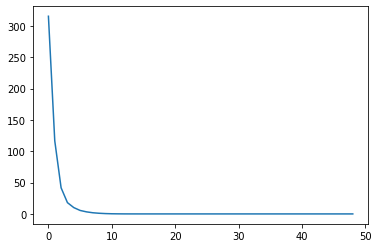

In [44]:
plt.plot(training_errors)

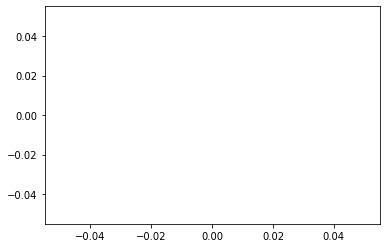

In [72]:
plt.plot(train_errors)
plt.plot(test_errors)

In [46]:
testing_errors

[309.9663735079038,
 111.52633514480678,
 39.143433444364696,
 18.539731776597474,
 10.647077298992446,
 5.558498614294133,
 3.782858289742158,
 2.229274750035258,
 1.4462730648780582,
 0.8845437880789921,
 0.5519513597188899,
 0.3592633065109059,
 0.2798918034748662,
 0.3372941600704685,
 0.25392468501565374,
 0.23293805765529,
 0.24736451847127378,
 0.25036522945575046,
 0.24411012140668045,
 0.29645150001495507,
 0.23352131855849745,
 0.3959744596239035,
 0.29313902249881046,
 0.43847454559424315,
 0.24183225759837168,
 0.28071933284634276,
 0.2890753781378106,
 0.2542276476485607,
 0.34354692720770863,
 0.28685890290455524,
 0.2722126115761917,
 0.24941224123196362,
 0.25001362694887375,
 0.31245452928801204,
 0.2814307361817987,
 0.34794127128714386,
 0.23083190226742076,
 0.2705857477179322,
 0.27214767579857513,
 0.2636455301120469,
 0.30007456826797674,
 0.3109382385113295,
 0.26494846860381654,
 0.27065930662860754,
 0.2767787870657838,
 0.2614128812255968,
 0.2273744885187714

In [48]:
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(25)

<Figure size 1800x1800 with 0 Axes>

In [ ]:
f = plt.figure()
f.set_figwidth(500)
f.set_figheight(500)
plt.plot(training_errors)
plt.plot(testing_errors)
plt.show()

In [53]:
# f = plt.figure()
# f.set_figwidth(150)
# f.set_figheight(150)
plt.plot(training_errors)
plt.plot(testing_errors)
plt.show()

In [55]:
tr_er = [math.exp(num) for num in training_errors]
te_er = [math.exp(num) for num in testing_errors]

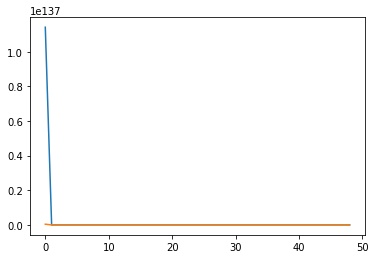

In [59]:
plt.plot(tr_er)
plt.plot(te_er)

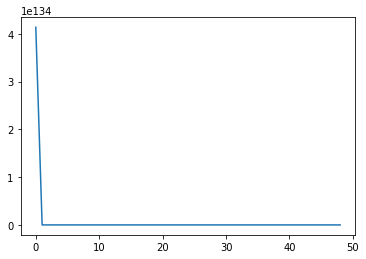

In [58]:
plt.plot(te_er)

In [80]:
def f(a, /, b):
    print('a ', a, 'b ', b)

f(9, b = 5)

a  9 b  5
